# Python Project-Obesity Prediction
### Adi Froimovich, Neta Bzezinsky
### **Intro** :

Obesity poses a significant global health threat, impacting both physical and mental well-being while straining healthcare systems. Predicting obesity allows for early intervention, enabling tailored strategies to prevent its onset and promote healthier habits. Through this project, we aim to leverage machine learning to develop personalized approaches for obesity prevention and management, ultimately improving public health outcomes. <br>

### The source of the data :
The data was taken from the UC Irvine Machine Learning Repository [website](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)



#### How the data was collected and processed :

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity
The data was collected using a web platform with a survey where anonymous users answered each question,the survey was accesible online for 30 days.
After labeling process,the categories of obesity levels were unbalanced, and after the balancing class problem was identified, synthetic data was generated, up to 77% of the data, using the tool Weka and the filter SMOTE

### **Features** :

* **Gender** - Categorical variable-female-0/male-1
* **Age** - continuous variable
* **Height** - continuous variable
* **Weight** - continuous variable
* **Family History with Overweight** -Binary-yes-1/no-0
* **High Caloric Frequency** - Binary-yes-1/no-0
* **Vegetable Frequency** - Integer
* **Daily Meals Count** - Continuous
* **Snacking Habit** - categorical - no : 0 ,Sometimes : 1, Frequently : 2, Always : 3
* **Smoker** -Binary- yes-1/no-0
* **Water drinking** - - continuous variable
* **Calorie Monitoring** - Continuous
* **Physical Activity Frequency** - Continuous
* **Tech Usage Hours** - Integer
* **Alcohol Consumption** - categorical - no : 0, Sometimes : 1, Frequently : 2 , Always : 3
* **Transport**  - dummy

### **Target**:
* **NObeyesdad** - Obesity status Continuous - 0 Very Slim to 6 Very Obeys


# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()

In [ ]:
df = pd.read_csv("Obesity_DataSet.csv")


#Preprocessing


In [ ]:
label_encoder = LabelEncoder()

# Encode categorical columns using LabelEncoder
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])

# Rename 'FAVC' to 'HighCaloricFreq'
df.rename(columns={'FAVC': 'HighCaloricFreq'}, inplace=True)

# Rename 'FCVC' to 'VegetableFrequency' and 'NCP' to 'DailyMealsCount'
df.rename(columns={'FCVC': 'VegetableFrequency', 'NCP': 'DailyMealsCount'}, inplace=True)

# Map 'CAEC' to numerical values and rename it to 'SnackingHabit'
caec_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df['CAEC'] = df['CAEC'].map(caec_mapping)
df.rename(columns={'CAEC': 'SnackingHabit'}, inplace=True)

# Encode 'SMOKE' using LabelEncoder and rename it to 'Smoker'
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df.rename(columns={'SMOKE': 'Smoker'}, inplace=True)

# Rename 'CH2O' to 'WaterDrinking'
df.rename(columns={'CH2O': 'WaterDrinking'}, inplace=True)

# Encode 'SCC' using LabelEncoder and rename it to 'CalorieMonitoring'
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df.rename(columns={'SCC': 'CalorieMonitoring'}, inplace=True)

# Rename 'FAF' to 'PhysicalActivityFreq' and 'TUE' to 'TechUsageHours'
df.rename(columns={'FAF': 'PhysicalActivityFreq', 'TUE': 'TechUsageHours'}, inplace=True)

# Map 'CALC' to numerical values and rename it to 'AlcoholConsumption'
calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df['CALC'] = df['CALC'].map(calc_mapping)
df.rename(columns={'CALC': 'AlcoholConsumption'}, inplace=True)

# Rename 'MTRANS' to 'Transport'
df.rename(columns={'MTRANS': 'Transport'}, inplace=True)

# Save the original 'Transport' column
original_transport_column = df['Transport']

# Get dummy variables for 'Transport' and concatenate with the original DataFrame
df = pd.get_dummies(df, columns=['Transport'], prefix='Transport', prefix_sep='_')
df = pd.concat([df, original_transport_column], axis=1)

# Map 'NObeyesdad' to numerical values
NObeyesdad_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
                      'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
df['NObeyesdad'] = df['NObeyesdad'].map(NObeyesdad_mapping)

# Define the desired column order
column_order = ['NObeyesdad', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'HighCaloricFreq',
                'VegetableFrequency', 'DailyMealsCount', 'SnackingHabit', 'Smoker', 'CalorieMonitoring',
                'PhysicalActivityFreq', 'TechUsageHours', 'AlcoholConsumption', 'Transport_Automobile',
                'Transport_Bike', 'Transport_Motorbike', 'Transport_Public_Transportation', 'Transport_Walking',
                'Transport']

# Reorder columns in the DataFrame
df = df[column_order]


A glipse of the Data:

In [ ]:
df.head()

NObeyesdad  Gender   Age  Height  Weight  family_history_with_overweight  \
0           1       0  21.0    1.62    64.0                               1   
1           1       0  21.0    1.52    56.0                               1   
2           1       1  23.0    1.80    77.0                               1   
3           2       1  27.0    1.80    87.0                               0   
4           3       1  22.0    1.78    89.8                               0   

   HighCaloricFreq  VegetableFrequency  DailyMealsCount  SnackingHabit  ...  \
0                0                 2.0              3.0              1  ...   
1                0                 3.0              3.0              1  ...   
2                0                 2.0              3.0              1  ...   
3                0                 3.0              3.0              1  ...   
4                0                 2.0              1.0              1  ...   

   CalorieMonitoring  PhysicalActivityFreq  TechUsageHours  \
0                  0                   0.0             1.0   
1                  1                   3.0             0.0   
2                  0                   2.0             1.0   
3                  0                   2.0             0.0   
4                  0                   0.0             0.0   

   AlcoholConsumption  Transport_Automobile  Transport_Bike  \
0                   0                     0               0   
1                   1                     0               0   
2                   2                     0               0   
3                   2                     0               0   
4                   1                     0               0   

   Transport_Motorbike  Transport_Public_Transportation  Transport_Walking  \
0                    0                                1                  0   
1                    0                                1                  0   
2                    0                                1                  0   
3                    0                                0                  1   
4                    0                                1                  0   

               Transport  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  

[5 rows x 21 columns]

In [ ]:
df.describe()

NObeyesdad       Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      3.112269     0.505921    24.312600     1.701677    86.586058   
std       1.985062     0.500083     6.345968     0.093305    26.191172   
min       0.000000     0.000000    14.000000     1.450000    39.000000   
25%       1.000000     0.000000    19.947192     1.630000    65.473343   
50%       3.000000     1.000000    22.777890     1.700499    83.000000   
75%       5.000000     1.000000    26.000000     1.768464   107.430682   
max       6.000000     1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight  HighCaloricFreq  VegetableFrequency  \
count                     2111.000000      2111.000000         2111.000000   
mean                         0.817622         0.883941            2.419043   
std                          0.386247         0.320371            0.533927   
min                          0.000000         0.000000            1.000000   
25%                          1.000000         1.000000            2.000000   
50%                          1.000000         1.000000            2.385502   
75%                          1.000000         1.000000            3.000000   
max                          1.000000         1.000000            3.000000   

       DailyMealsCount  SnackingHabit       Smoker  CalorieMonitoring  \
count      2111.000000    2111.000000  2111.000000        2111.000000   
mean          2.685628       1.140692     0.020843           0.045476   
std           0.778039       0.468543     0.142893           0.208395   
min           1.000000       0.000000     0.000000           0.000000   
25%           2.658738       1.000000     0.000000           0.000000   
50%           3.000000       1.000000     0.000000           0.000000   
75%           3.000000       1.000000     0.000000           0.000000   
max           4.000000       3.000000     1.000000           1.000000   

       PhysicalActivityFreq  TechUsageHours  AlcoholConsumption  \
count           2111.000000     2111.000000         2111.000000   
mean               1.010298        0.657866            0.731407   
std                0.850592        0.608927            0.515498   
min                0.000000        0.000000            0.000000   
25%                0.124505        0.000000            0.000000   
50%                1.000000        0.625350            1.000000   
75%                1.666678        1.000000            1.000000   
max                3.000000        2.000000            3.000000   

       Transport_Automobile  Transport_Bike  Transport_Motorbike  \
count           2111.000000     2111.000000          2111.000000   
mean               0.216485        0.003316             0.005211   
std                0.411946        0.057502             0.072015   
min                0.000000        0.000000             0.000000   
25%                0.000000        0.000000             0.000000   
50%                0.000000        0.000000             0.000000   
75%                0.000000        0.000000             0.000000   
max                1.000000        1.000000             1.000000   

       Transport_Public_Transportation  Transport_Walking  
count                      2111.000000        2111.000000  
mean                          0.748460           0.026528  
std                           0.434001           0.160737  
min                           0.000000           0.000000  
25%                           0.000000           0.000000  
50%                           1.000000           0.000000  
75%                           1.000000           0.000000  
max                           1.000000           1.000000

In [ ]:
df.isnull().mean()

NObeyesdad                         0.0
Gender                             0.0
Age                                0.0
Height                             0.0
Weight                             0.0
family_history_with_overweight     0.0
HighCaloricFreq                    0.0
VegetableFrequency                 0.0
DailyMealsCount                    0.0
SnackingHabit                      0.0
Smoker                             0.0
CalorieMonitoring                  0.0
PhysicalActivityFreq               0.0
TechUsageHours                     0.0
AlcoholConsumption                 0.0
Transport_Automobile               0.0
Transport_Bike                     0.0
Transport_Motorbike                0.0
Transport_Public_Transportation    0.0
Transport_Walking                  0.0
Transport                          0.0
dtype: float64

We can see that there are no NA values

In [ ]:
for col in df.columns:
    # Exclude the dummy variables for the 'Transport' column
    if 'Transport_' not in col:
        print(f"\nColumn Name: {col}")
        print(df[col].value_counts())



Column Name: NObeyesdad
4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: NObeyesdad, dtype: int64

Column Name: Gender
1    1068
0    1043
Name: Gender, dtype: int64

Column Name: Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
17.178483      1
34.389679      1
18.701766      1
17.971574      1
19.703095      1
Name: Age, Length: 1402, dtype: int64

Column Name: Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.715118     1
1.700740     1
1.507106     1
1.565288     1
1.699474     1
Name: Height, Length: 1574, dtype: int64

Column Name: Weight
80.000000    59
70.000000    43
50.000000    42
75.000000    40
60.000000    37
             ..
84.315608     1
82.853749     1
99.623778     1
93.798055     1
77.205685     1
Name: Weight, Length: 1525, dtype: int64

Column Name: family_history_with_overweight
1    1726
0     385
Name: family_history_with_overweight, dt

Before delving into our machine learning modeling, it's crucial to note that the target variable "NObeyesdad" appears to be balanced across its categories. This balance is essential as it ensures that our model will not be skewed towards predicting one particular outcome over others. Here's a breakdown of the counts for each category:

Category 0: 272 <Br>
Category 1: 287 <Br>
Category 2: 290 <Br>
Category 3: 290 <Br>
Category 4: 351 <Br>
Category 5: 297 <Br>
Category 6: 324 <Br> <br>
This balanced distribution provides a solid foundation for training our model effectively. Let's proceed with confidence, knowing that our dataset is well-balanced and ready for analysis.

See The variance of each feature

In [ ]:
(df.var(axis = 0).sort_values()).round(2)

<ipython-input-9-3fd7610e27a4>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.var(axis = 0).sort_values()).round(2)


Transport_Bike                       0.00
Transport_Motorbike                  0.01
Height                               0.01
Smoker                               0.02
Transport_Walking                    0.03
CalorieMonitoring                    0.04
HighCaloricFreq                      0.10
family_history_with_overweight       0.15
Transport_Automobile                 0.17
Transport_Public_Transportation      0.19
SnackingHabit                        0.22
Gender                               0.25
AlcoholConsumption                   0.27
VegetableFrequency                   0.29
TechUsageHours                       0.37
DailyMealsCount                      0.61
PhysicalActivityFreq                 0.72
NObeyesdad                           3.94
Age                                 40.27
Weight                             685.98
dtype: float64

##Correlations

<ipython-input-10-cb5a53f0e723>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


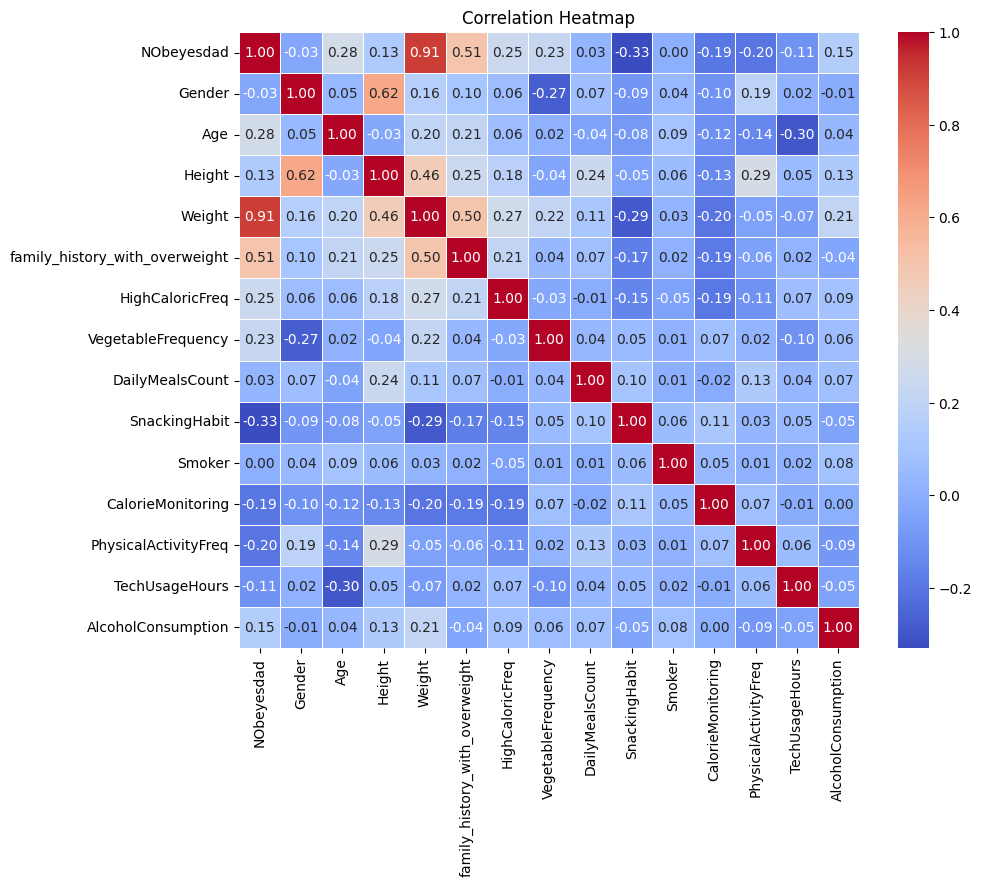

In [ ]:
X_corr = df.drop(['Transport_Automobile','Transport_Bike','Transport_Motorbike','Transport_Public_Transportation','Transport_Walking'], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(X_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Since the correlation heatmap indicates a strong correlation between the Weight variable and our target variable,<br> it suggests that models could predict the target variable effectively due to this high correlation.<br> Hence, it is advisable to consider dropping the Weight column.

In [ ]:
df = df.drop(columns = 'Weight')

In [ ]:
df.head()

NObeyesdad  Gender   Age  Height  family_history_with_overweight  \
0           1       0  21.0    1.62                               1   
1           1       0  21.0    1.52                               1   
2           1       1  23.0    1.80                               1   
3           2       1  27.0    1.80                               0   
4           3       1  22.0    1.78                               0   

   HighCaloricFreq  VegetableFrequency  DailyMealsCount  SnackingHabit  \
0                0                 2.0              3.0              1   
1                0                 3.0              3.0              1   
2                0                 2.0              3.0              1   
3                0                 3.0              3.0              1   
4                0                 2.0              1.0              1   

   Smoker  CalorieMonitoring  PhysicalActivityFreq  TechUsageHours  \
0       0                  0                   0.0             1.0   
1       1                  1                   3.0             0.0   
2       0                  0                   2.0             1.0   
3       0                  0                   2.0             0.0   
4       0                  0                   0.0             0.0   

   AlcoholConsumption  Transport_Automobile  Transport_Bike  \
0                   0                     0               0   
1                   1                     0               0   
2                   2                     0               0   
3                   2                     0               0   
4                   1                     0               0   

   Transport_Motorbike  Transport_Public_Transportation  Transport_Walking  \
0                    0                                1                  0   
1                    0                                1                  0   
2                    0                                1                  0   
3                    0                                0                  1   
4                    0                                1                  0   

               Transport  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation

<ipython-input-53-4e76a2160e21>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




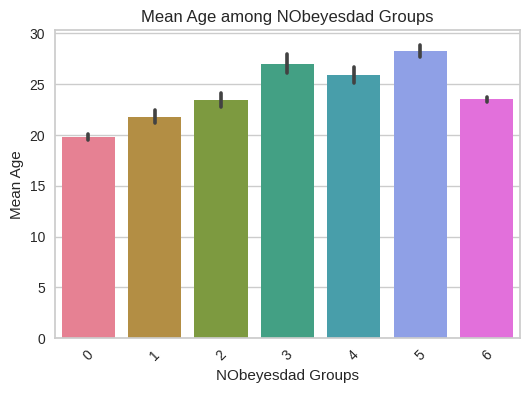

<ipython-input-53-4e76a2160e21>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




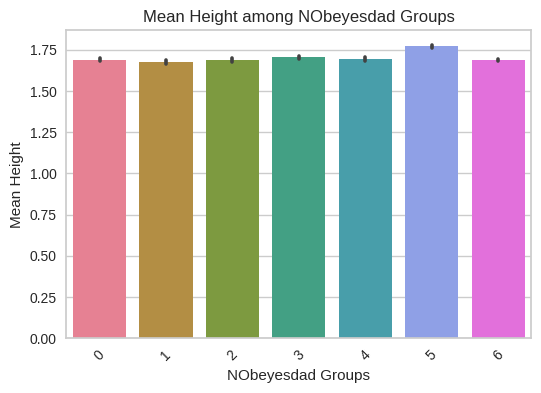

<ipython-input-53-4e76a2160e21>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




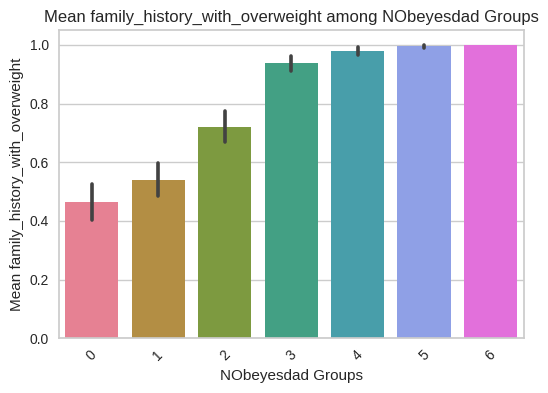

<ipython-input-53-4e76a2160e21>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




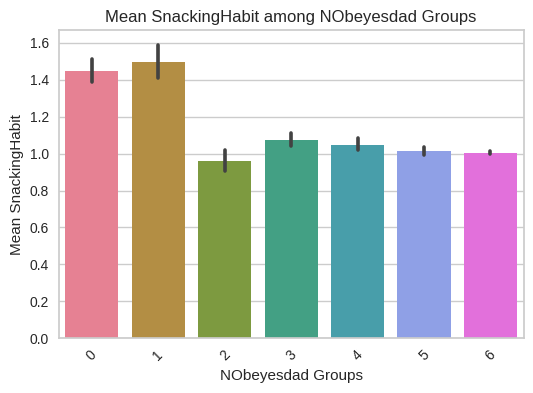

<ipython-input-53-4e76a2160e21>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




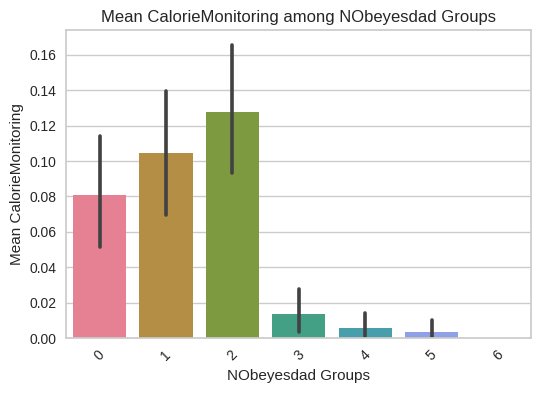

<ipython-input-53-4e76a2160e21>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




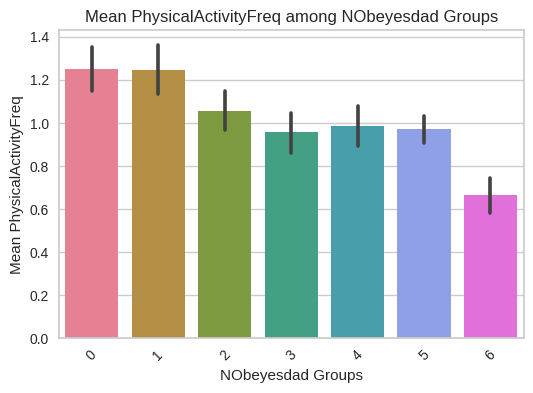

<ipython-input-53-4e76a2160e21>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




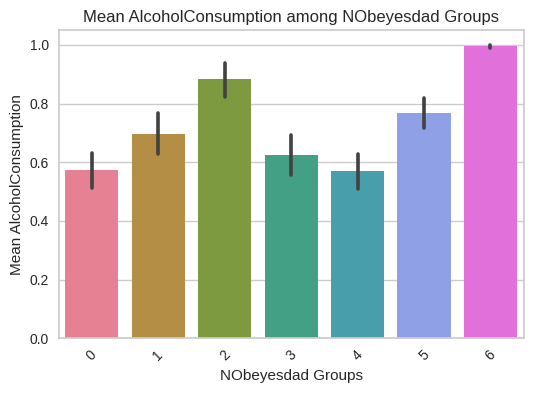

In [ ]:
# Define a list of features for EDA
features = ['Age', 'Height', 'family_history_with_overweight','SnackingHabit',
            'CalorieMonitoring', 'PhysicalActivityFreq',
            'AlcoholConsumption']

# Define a color palette for better differentiation
palette = sns.color_palette("husl", len(df['NObeyesdad'].unique()))  # Adjust the palette as needed

# Perform EDA for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='NObeyesdad', y=feature, data=df, estimator=np.mean, palette=palette)  # Calculate mean for each target value
    plt.title(f'Mean {feature} among NObeyesdad Groups')
    plt.xlabel('NObeyesdad Groups')
    plt.ylabel('Mean ' + feature)
    plt.xticks(rotation=45)
    plt.show()


when the groups are :

* Group 0 :Insufficient_Weight
* Group 1: Normal_Weight
*Group 2: Overweight_Level_I
*Group 3: Overweight_Level_II
*Group 4: Obesity_Type_I
*Group 5: Obesity_Type_II
*Group 6: Obesity_Type_III
  





* We observe that individuals categorized as Insufficient_Weight tend to be younger compared to other groups. Height appears to exhibit uniformity across all groups.

* There is a noticeable correlation pattern between the presence of a family history of overweight: groups 0-6 display varying mean values, with lower groups showing lower family history and higher groups exhibiting higher family history, suggesting a genetic and environmental influence on obesity.

* Slimmer individuals demonstrate a higher tendency for snacking habits. Additionally, groups 0-2 show a propensity for calorie monitoring, indicating its significance in maintaining a healthy weight.

* There is a strong negative correlation between physical activity frequency and certain groups, suggesting a potential link between lower physical activity levels and obesity. Group 6 shows a higher consumption of alcohol, hinting at its possible contribution to weight gain due to its high-calorie content and potentially lax self-discipline.

# Train-Test split

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame with the target variable in the first column
X = df.iloc[:, 1:-1]  # Features (excluding the first and last columns)
y = df.iloc[:, 0]     # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1688, 18)

In [ ]:
X_test.shape

(423, 18)

Making sure our target is balanced in the train and test splits.

In [ ]:
y_train.value_counts()

4    273
6    261
3    240
5    239
2    234
1    225
0    216
Name: NObeyesdad, dtype: int64

In [ ]:
y_test.value_counts()

4    78
6    63
1    62
5    58
0    56
2    56
3    50
Name: NObeyesdad, dtype: int64

Normalization with StandardScaler centers the data around a mean of 0, ensuring that the average value of the scaled features becomes 0. <Br>
Additionally, it scales the data to have a variance of 1, meaning that the spread or dispersion of the values across the dataset becomes standardized.<br>
This process aids in making features more comparable and can improve the performance of various machine learning algorithms by ensuring consistent feature scales.<br>

In [ ]:
scaler = StandardScaler().fit(X_train) # training the scaler model using the train set!
X_train_scaled = scaler.transform(X_train) # scaling the train set
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.mean()

1.1330238134405231e-16

In [ ]:
X_train_scaled.var()

1.0000000000000002

Indeed, our training data provides now avg mean very close to 0 and var of 1.

#Classification-Supervised Learning

> we will consider 9 methods:
* Logistic Regression with l2 and l1
* KNN
* LDA and QDA
* SVM with linear, polynomial and radial kernels
* Tree classification and Random Forest





### Fitting logistic regression with L2 penalty defeault parameter ("Ridge")

In [ ]:
log_reg = LogisticRegression(solver ='saga',max_iter=1000)

In [ ]:
log_reg.fit(X_train_scaled,y_train)
print(f'Logit Train Accuracy: {round(np.mean(log_reg.predict(X_train_scaled) == y_train),3)}')
print(f'Logit Test Accuracy: {round(np.mean(log_reg.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(log_reg.predict(X_test_scaled), y_test, margins=True)

Logit Train Accuracy: 0.597
Logit Test Accuracy: 0.603


NObeyesdad   0   1   2   3   4   5   6  All
row_0                                      
0           39  18   7   3   1   1   0   69
1            7  17   4   2   2   0   0   32
2            2   9  26   4   6   0   0   47
3            0   8   4  16   5   2   0   35
4            7   8  11  12  47   8   0   93
5            1   0   4  12  16  47   0   80
6            0   2   0   1   1   0  63   67
All         56  62  56  50  78  58  63  423

### Fitting logistic regression with L1 penalty ("Lasso")

why we use this method:

This method is advantageous for the dataset as it enables feature selection through the L1 regularization, commonly known as the Lasso penalty. This regularization technique is particularly valuable when dealing with datasets containing numerous attributes, allowing Logistic Regression to automatically select pertinent features. This process can enhance model interpretability and performance by focusing on the most relevant predictors while potentially reducing overfitting.



In [ ]:
parameters = {'penalty':['l1'], # L1 penalty = Lasso
              'C': np.logspace(-3, 3, num=1000)} # small C values means stronger regularization and the opposite

log_reg_l1_cv = GridSearchCV(log_reg, parameters, cv=10, n_jobs=-1, scoring='accuracy', verbose=10).fit(X_train_scaled, y_train)

In [ ]:
print(f'Lasso best parameters: {log_reg_l1_cv.best_params_}')
print(f'Lasso best estimator: {log_reg_l1_cv.best_estimator_}')
print(f'Lasso Train Accuracy: {round(np.mean(log_reg_l1_cv.predict(X_train) == y_train),3)}')
print(f'Lasso Test Accuracy: {round(np.mean(log_reg_l1_cv.predict(X_test) == y_test),3)}')
pd.crosstab(log_reg_l1_cv.predict(X_test), y_test, margins=True)

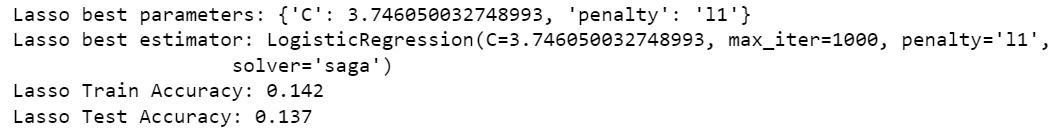

Lasso gave us pure predictions, it also took couple of hours to run so the output from our Lasso is attached.<br>
We will choose the 'Ridge' method.


##KNN

Why we use knn:

KNN emerges as a fitting choice for the dataset due to its non-parametric nature, avoiding strong assumptions about the underlying data distribution, and its capability to capture intricate, non-linear relationships among features. Given the dataset's multiple classes in the target feature, KNN can adeptly classify instances by gauging their similarity to neighboring data points within the feature space.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid={'n_neighbors': range(3, 200, 2)}, cv = 10, n_jobs=-1, verbose=10).fit(X_train_scaled, y_train)



Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [ ]:
print(f'KNN best parameters: {knn_cv.best_params_}')
print(f'KNN Train Accuracy: {round(np.mean(knn_cv.predict(X_train_scaled) == y_train),3)}')
print(f'KNN Test Accuracy: {round(np.mean(knn_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(knn_cv.predict(X_test_scaled), y_test, margins=True)

KNN best parameters: {'n_neighbors': 3}
KNN Train Accuracy: 0.879
KNN Test Accuracy: 0.783


NObeyesdad   0   1   2   3   4   5   6  All
row_0                                      
0           50   8   5   1   1   0   0   65
1            2  28   8   3   4   0   0   45
2            3   6  38   3   4   1   0   55
3            0  13   2  37   6   2   0   60
4            0   5   3   3  61   1   0   73
5            1   1   0   2   2  54   0   60
6            0   1   0   1   0   0  63   65
All         56  62  56  50  78  58  63  423

##LDA- Linear Discriminat Analysis

why we use LDA and QDA:

Both LDA and QDA, as parametric methods, offer models of class distribution within the dataset. LDA assumes a common covariance matrix across classes, making it suitable for well-separated classes with normally distributed data. Conversely, QDA relaxes this constraint, allowing each class to possess its own covariance matrix, thereby accommodating more complex data relationships.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training set
lda.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test_scaled)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("LDA Train Set Accuray:", round(np.mean(lda.predict(X_train_scaled)==y_train),3))
print("LDA Test Set Accuracy:", test_accuracy)

LDA Train Set Accuray: 0.577
LDA Test Set Accuracy: 0.5933806146572104


##QDA- Quadratic Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create an LDA classifier
qda = QuadraticDiscriminantAnalysis()

# Fit the LDA model on the training set
qda.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test_scaled)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("QDA Train Set Accuray:", round(np.mean(qda.predict(X_train_scaled)==y_train),3))
print("QDA Test Set Accuracy:", test_accuracy)

QDA Train Set Accuray: 0.312
QDA Test Set Accuracy: 0.30260047281323876


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Classification Trees

why we use this methods:

Decision Trees and Random Forest, intuitive models capturing non-linear relationships and feature interactions, are pertinent for the dataset. Decision Trees segment the feature space into regions, rendering them interpretable and conducive to visualization. Meanwhile, Random Forest amalgamates multiple decision trees, potentially enhancing generalization performance and mitigating the risk of overfitting.

In [ ]:
from sklearn import tree
import time
C_tree = tree.DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': range(5,25),
              'min_samples_split': range(2,11),
              'min_samples_leaf': range(2,11),
              'max_features': range(3, 19)}

start = time.time()
classification_tree_cv = RandomizedSearchCV(C_tree, parameters, cv=10, n_iter=2000, n_jobs=-1, verbose=3).fit(X_train_scaled, y_train) # Randomized search due to high number of combinations
stop = time.time()

print(f'Classification Tree running time = {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
Classification Tree running time = 1.632 in minutes


In [ ]:
print(classification_tree_cv.best_params_)
print(f'Train Accuracy = {round(classification_tree_cv.best_score_,3)}')
print(f'Test Accuracy = {round(classification_tree_cv.score(X_test_scaled, y_test),3)}')
pd.crosstab(classification_tree_cv.best_estimator_.predict(X_test_scaled), y_test, margins=True)

{'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 14, 'max_depth': 19}
Train Accuracy = 0.755
Test Accuracy = 0.775


NObeyesdad   0   1   2   3   4   5   6  All
row_0                                      
0           46   4   5   3   1   0   0   59
1            3  39   7   3   6   1   0   59
2            6   6  36   2   1   0   0   51
3            1  10   5  33  12   2   0   63
4            0   2   3   4  56   0   0   65
5            0   1   0   5   2  55   0   63
6            0   0   0   0   0   0  63   63
All         56  62  56  50  78  58  63  423

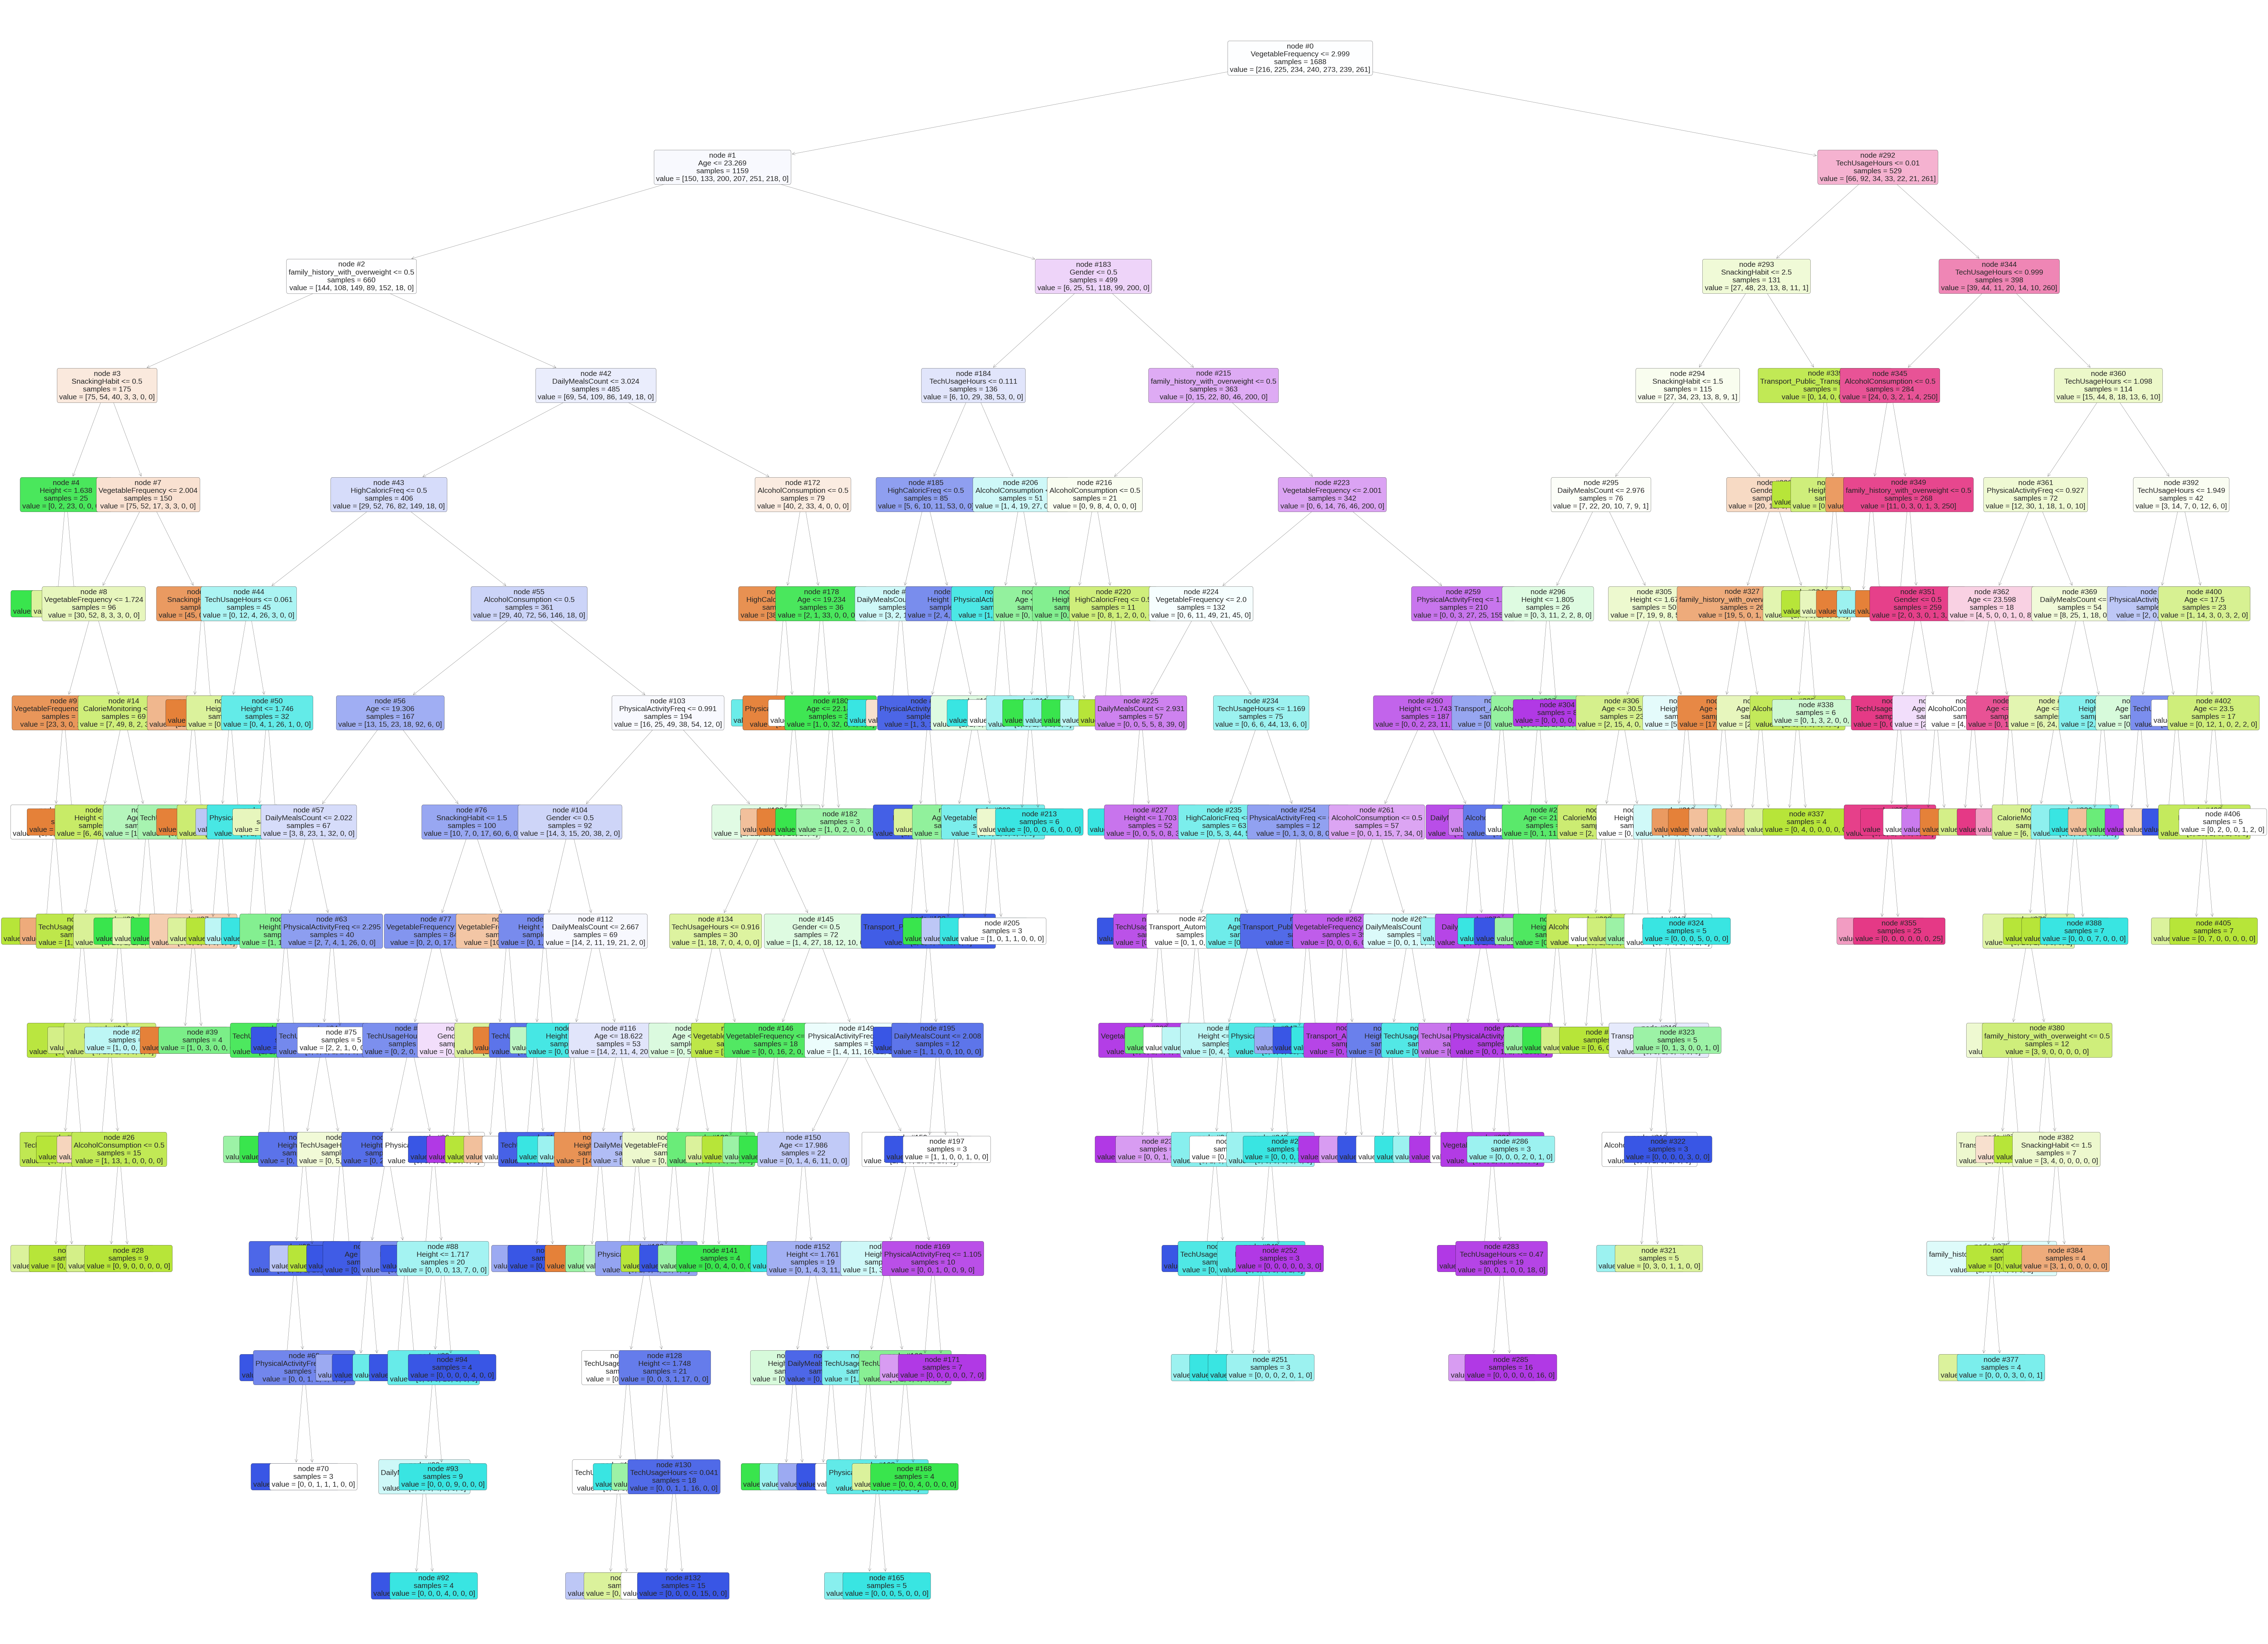

In [ ]:
plt.figure(figsize=(80,60))
tree.plot_tree(classification_tree_cv.best_estimator_.fit(X_train, y_train), fontsize=15, filled=True, feature_names=X.columns,
              impurity=False, node_ids=True, rounded=True)
plt.show()



**Insight: Vegetable Frequency - The Crucial Splitter**

Upon visualizing the decision tree classification plot, a striking observation emerges: the 'VegetableFrequency' feature stands out as the primary splitter at the root node, shaping the subsequent tree structure. This finding underscores the profound influence of dietary habits on obesity levels, as captured by our dataset.

**Conclusion:**

The identification of 'VegetableFrequency' as the key splitter in our decision tree underscores the multifaceted relationship between dietary habits and obesity. Leveraging this insight can inform targeted interventions and empower individuals to make healthier choices, ultimately contributing to improved public health outcomes.

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1)
parameters = {'max_depth': range(5,25),
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(2, 11),
              'max_features': [4], # round(sqrt(19)) = 4
              'n_estimators': [100,300,700,1000]}

parameters = {
    'max_depth': range(5, 15),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(2, 6),
    'max_features': [4],  # round(sqrt(19)) = 4
    'n_estimators': [50, 100, 200]  # Reduced number of estimators
}
start = time.time()
RF_cv = RandomizedSearchCV(RF, parameters, cv=10, n_iter=200, # 200 and not 2000 as before
                               n_jobs=-1, verbose=3).fit(X_train_scaled, y_train) # Randomized search due to high number of combinations
stop = time.time()

print(f'Random Forest running time = {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Random Forest running time = 8.64 in minutes


In [ ]:
print(RF_cv.best_params_)
print(f'Random Forest Train Accuracy = {round(RF_cv.score(X_train_scaled, y_train),3)}')
print(f'Random Forest Test Accuracy = {round(RF_cv.score(X_test_scaled, y_test),3)}')

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 14}
Random Forest Train Accuracy = 0.969
Random Forest Test Accuracy = 0.865


##SVM

why we use SVM:

SVMs serve as robust classifiers capable of managing high-dimensional data and non-linear relationships. By employing various kernels such as linear, polynomial, and radial, one can explore diverse decision boundaries and model complexities. Notably, radial kernels  prove valuable when addressing non-linearly separable data, a potential characteristic of the dataset.


In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True, max_iter = 500, random_state=1)
parameters = {'C': np.arange(0.1,5,0.2), 'kernel': ['linear']}

start = time.time()
svm_l_cv = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train_scaled, y_train)
stop = time.time()

print(f'SVM Linear running time {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVM Linear running time 1.247 in minutes


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Linear kernel best parameters: {svm_l_cv.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Linear kernel Train Accuracy: {round(np.mean(svm_l_cv.predict(X_train_scaled) == y_train),3)}')
print(f'SVM Linear kernel Test Accuracy: {round(np.mean(svm_l_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(svm_l_cv.best_estimator_.predict(X_test_scaled), y_test, margins=True)

SVM Linear kernel best parameters: {'C': 0.5000000000000001, 'kernel': 'linear'}
SVM Linear kernel Train Accuracy: 0.666
SVM Linear kernel Test Accuracy: 0.652


NObeyesdad   0   1   2   3   4   5   6  All
row_0                                      
0           41  17   5   3   0   1   0   67
1            7  23   8   1   3   0   0   42
2            4  10  30   6   8   1   0   59
3            0   5   2  19   7   2   0   35
4            4   6  11  14  48   2   0   85
5            0   1   0   6  11  52   0   70
6            0   0   0   1   1   0  63   65
All         56  62  56  50  78  58  63  423

In [ ]:
parameters = {'C': np.arange(0.1,5,0.2), 'kernel': ['poly'], 'degree': np.arange(2,6,1)}

start = time.time()
svm_p_cv = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train_scaled, y_train)
stop = time.time()

print(f'SVM Polynomial running time {round((stop-start)/60,3)} in minutes\n')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
SVM Polynomial running time 6.802 in minutes



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Polynomial kernel best parameters: {svm_p_cv.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Polynomial kernel Train Accuracy: {round(np.mean(svm_p_cv.predict(X_train_scaled) == y_train),3)}')
print(f'SVM Polynomial kernel Test Accuracy: {round(np.mean(svm_p_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(svm_p_cv.best_estimator_.predict(X_test_scaled), y_test, margins=True)

SVM Polynomial kernel best parameters: {'C': 4.7, 'degree': 3, 'kernel': 'poly'}
SVM Polynomial kernel Train Accuracy: 0.902
SVM Polynomial kernel Test Accuracy: 0.79


NObeyesdad   0   1   2   3   4   5   6  All
row_0                                      
0           51   6   4   0   1   0   0   62
1            3  32   7   2   2   1   0   47
2            1   5  37   3   2   0   0   48
3            0  10   0  32   2   2   0   46
4            1   7   7   8  66   2   0   91
5            0   2   1   4   4  53   0   64
6            0   0   0   1   1   0  63   65
All         56  62  56  50  78  58  63  423

In [ ]:
parameters = {'C': np.arange(0.1,5,0.2), 'kernel': ['rbf'], 'gamma': 10**np.arange(-5, 0, 1, dtype=float)}

start = time.time()
svm_r_cv = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train_scaled, y_train)
stop = time.time()

print(f'SVM Radial running time {round((stop-start)/60,3)} in minutes\n')

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
SVM Radial running time 12.956 in minutes



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Radial kernel best parameters: {svm_r_cv.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Radial kernel Train Accuracy: {round(np.mean(svm_r_cv.predict(X_train_scaled) == y_train),3)}')
print(f'SVM Radial kernel Test Accuracy: {round(np.mean(svm_r_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(svm_r_cv.best_estimator_.predict(X_test_scaled), y_test, margins=True)

SVM Radial kernel best parameters: {'C': 4.500000000000001, 'gamma': 0.09999999999999999, 'kernel': 'rbf'}
SVM Radial kernel Train Accuracy: 0.945
SVM Radial kernel Test Accuracy: 0.825


NObeyesdad   0   1   2   3   4   5   6  All
row_0                                      
0           52   4   1   0   0   1   0   58
1            3  40  12   2   6   1   0   64
2            1   4  35   2   1   1   0   44
3            0   8   3  39   3   0   0   53
4            0   6   5   3  65   0   0   79
5            0   0   0   3   3  55   0   61
6            0   0   0   1   0   0  63   64
All         56  62  56  50  78  58  63  423

# Models Evaluation

In [ ]:
from sklearn.metrics import classification_report

def evaluate_models(models, model_names, X_test, y_test):
    metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        metrics_dict['Model'].append(name)
        metrics_dict['Accuracy'].append(round(report['accuracy'],3))
        metrics_dict['Precision'].append(round(report['macro avg']['precision'],3))
        metrics_dict['Recall'].append(round(report['macro avg']['recall'],3))
        metrics_dict['F1 Score'].append(round(report['macro avg']['f1-score'],3))

    metrics_df = pd.DataFrame(metrics_dict)
    return metrics_df

###Train Set

In [ ]:
Models = [log_reg, lda,qda,knn_cv,classification_tree_cv,RF_cv,svm_l_cv,svm_p_cv,svm_r_cv]
Labels = ['Logistic Regression', 'LDA','QDA',str(knn_cv.best_params_['n_neighbors'])+'-NN','Classification Tree','Random Forest',
         'SVM Linear kernel','SVM Polinomyal kernel','SVM Radial kernel']
train_metrics_df = evaluate_models(Models,Labels,X_train_scaled,y_train)
print("Training metrics for each model")
train_metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training metrics for each model


Model  Accuracy  Precision  Recall  F1 Score
0    Logistic Regression     0.597      0.594   0.591     0.579
1                    LDA     0.577      0.573   0.570     0.552
2                    QDA     0.312      0.405   0.299     0.250
3                   3-NN     0.879      0.877   0.877     0.876
4    Classification Tree     0.900      0.900   0.900     0.899
5          Random Forest     0.969      0.969   0.968     0.968
6      SVM Linear kernel     0.666      0.656   0.663     0.653
7  SVM Polinomyal kernel     0.902      0.907   0.900     0.901
8      SVM Radial kernel     0.945      0.947   0.944     0.945

###Test Set

In [ ]:
Models = [log_reg, lda,qda,knn_cv,classification_tree_cv,RF_cv,svm_l_cv,svm_p_cv,svm_r_cv]
Labels = ['Logistic Regression', 'LDA','QDA',str(knn_cv.best_params_['n_neighbors'])+'-NN','Classification Tree','Random Forest',
         'SVM Linear kernel','SVM Polinomyal kernel','SVM Radial kernel']
test_metrics_df = evaluate_models(Models,Labels,X_test_scaled,y_test)
print("Training metrics for each model")
test_metrics_df

Training metrics for each model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model  Accuracy  Precision  Recall  F1 Score
0    Logistic Regression     0.603      0.591   0.595     0.581
1                    LDA     0.593      0.579   0.585     0.565
2                    QDA     0.303      0.406   0.283     0.242
3                   3-NN     0.783      0.772   0.782     0.774
4    Classification Tree     0.775      0.772   0.774     0.771
5          Random Forest     0.865      0.870   0.862     0.865
6      SVM Linear kernel     0.652      0.641   0.647     0.638
7  SVM Polinomyal kernel     0.790      0.785   0.784     0.781
8      SVM Radial kernel     0.825      0.823   0.823     0.821

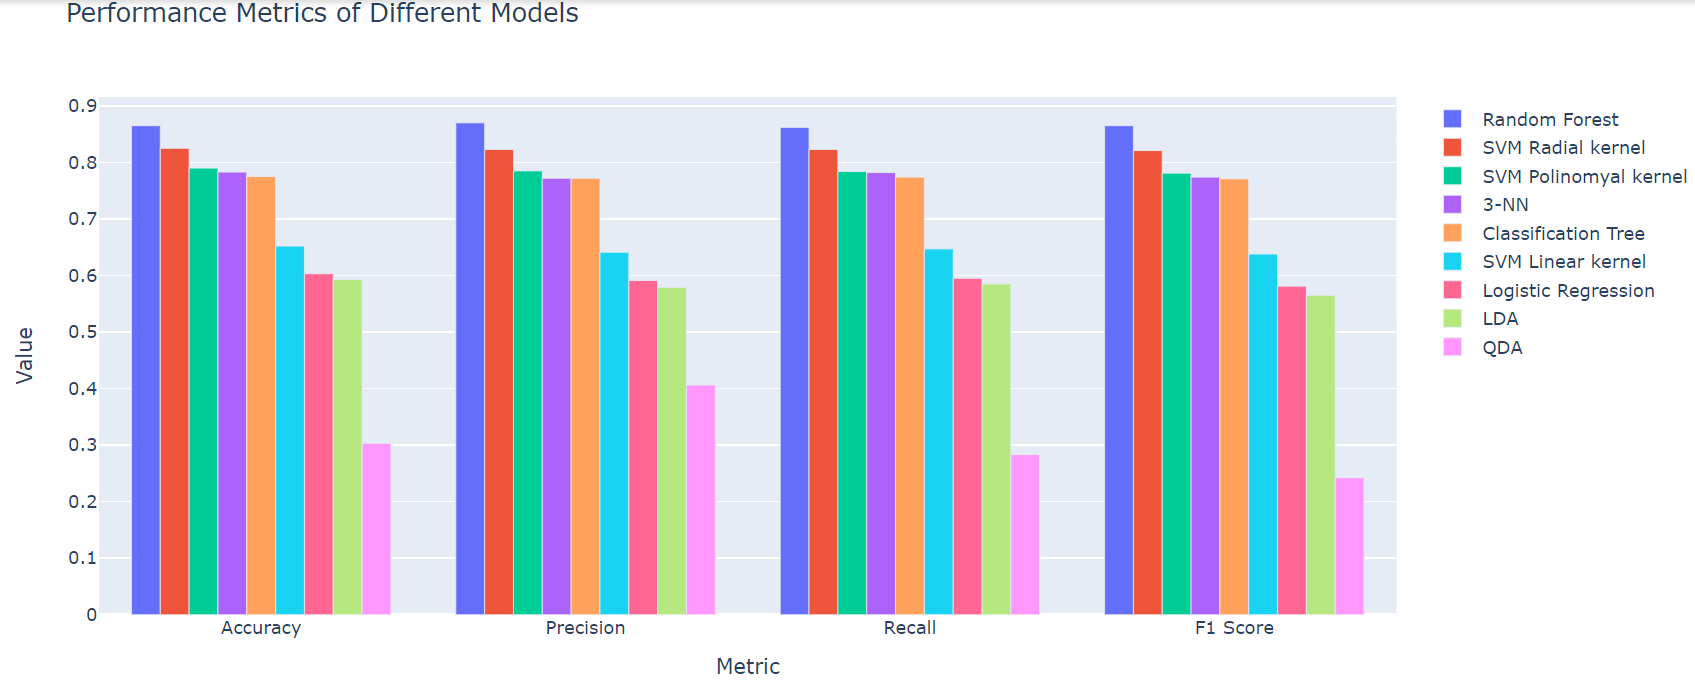


The table presents the performance metrics (accuracy, precision, recall, and F1 score) of various classification models on a test dataset.<br> The Logistic Regression and LDA models exhibit moderate performance, with accuracies around 60%.<br> The QDA model performs notably lower, indicating potential issues with its generalization capability.<br> Among the k-NN, Classification Tree, Random Forest, and SVM models, Random Forest and SVM Radial kernel demonstrate the highest overall performance, with accuracies surpassing 80% and well-balanced precision, recall, and F1 scores.<br> Based on these results, **Random Forest and SVM Radial kernel** emerge as the top-performing models.<br> Choosing between them could depend on factors such as computational efficiency, interpretability, and specific requirements of the problem domain.

# Unsupervised Learning

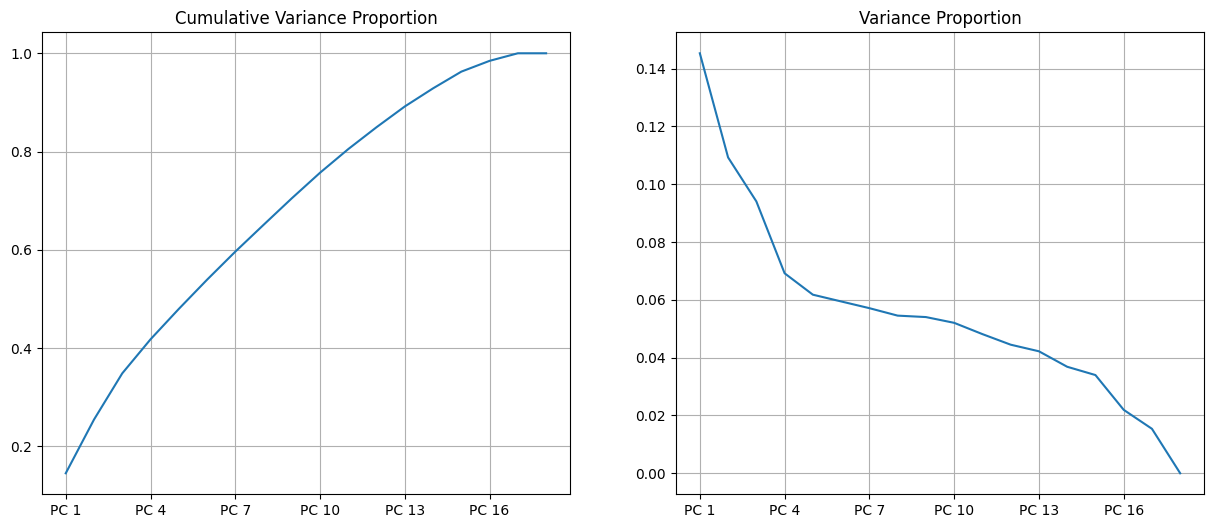

19


In [ ]:
from sklearn.decomposition import PCA
num_features = X.shape[1] + 1
X_scaled_data = StandardScaler(with_mean=False).fit(X).transform(X)
X_scaled_df = pd.DataFrame(X_scaled_data, columns=X.columns)
pca_model = PCA(n_components=num_features - 1).fit(X_scaled_df)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_features), np.cumsum(pca_model.explained_variance_ratio_))
plt.grid()
plt.title("Cumulative Variance Proportion")
plt.xticks(range(1, num_features, 3), labels=["PC " + str(i) for i in range(1, num_features, 3)])
plt.subplot(1, 2, 2)
plt.plot(range(1, num_features), pca_model.explained_variance_ratio_)
plt.grid()
plt.title("Variance Proportion")
plt.xticks(range(1, num_features, 3), labels=["PC " + str(i) for i in range(1, num_features, 3)])
plt.show()
print(num_features)

As we can see, if we want to keep 90% of the explain variance, we need to have 14 PC'S. thats not a big difference in our diminsion, altough the PCA lowered it by 5 dimensions.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

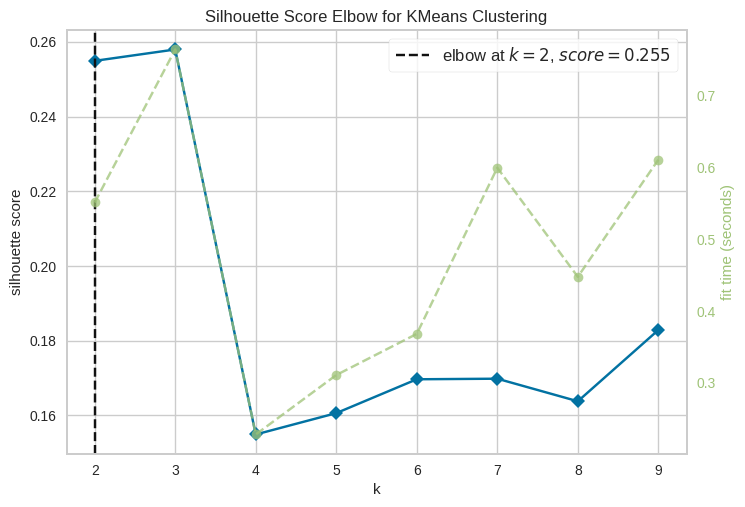

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer = KElbowVisualizer(KMeans(), k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X_scaled_data)        # Fit the data to the visualizer
visualizer.show()

We will use Silhouette plot to choose the optimal number of groups.
According to the plot, it is indeed the best to choose 3 clusters, lets plot the clusters and the first 2 PC's.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



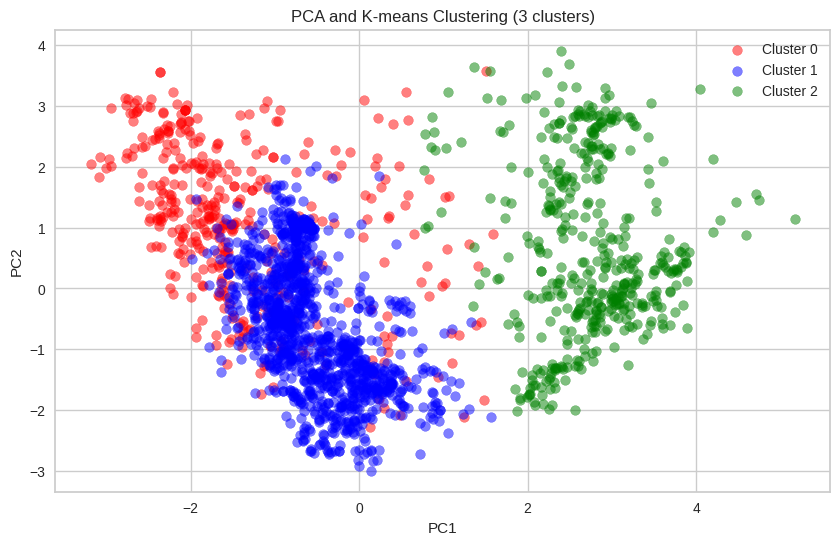

In [ ]:
# Perform PCA
pca = PCA(n_components=14)
X_pca = pca.fit_transform(X_scaled_data)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

# Plot the PCA-reduced data with clustering
plt.figure(figsize=(10, 6))

# Plot the cluster assignments
for cluster_label in np.unique(clusters):
    if cluster_label == 0:
        color = 'red'
    elif cluster_label == 1:
        color = 'blue'
    else:
        color = 'green'
    plt.scatter(X_pca[clusters == cluster_label, 0], X_pca[clusters == cluster_label, 1], label=f'Cluster {cluster_label}', c=color,alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA and K-means Clustering (3 clusters)')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from collections import defaultdict

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Assign each data point to its corresponding target class
class_cluster_mapping = defaultdict(list)
for class_label, cluster_label in zip(y, clusters):
    class_cluster_mapping[class_label].append(cluster_label)

# Print the distribution of classes within each cluster for 3 clusters
for class_label, cluster_labels in class_cluster_mapping.items():
    cluster_counts = np.bincount(cluster_labels, minlength=3)  # Ensure consistent length with 3 clusters
    print(f"Class {class_label}:")
    for cluster_label, count in enumerate(cluster_counts):
        print(f"Cluster {cluster_label}: {count} data points")


Silhouette Score: 0.22914665121681424
Class 1:
Cluster 0: 143 data points
Cluster 1: 102 data points
Cluster 2: 42 data points
Class 2:
Cluster 0: 55 data points
Cluster 1: 169 data points
Cluster 2: 66 data points
Class 3:
Cluster 0: 58 data points
Cluster 1: 137 data points
Cluster 2: 95 data points
Class 4:
Cluster 0: 8 data points
Cluster 1: 232 data points
Cluster 2: 111 data points
Class 0:
Cluster 0: 122 data points
Cluster 1: 105 data points
Cluster 2: 45 data points
Class 5:
Cluster 0: 2 data points
Cluster 1: 199 data points
Cluster 2: 96 data points
Class 6:
Cluster 0: 0 data points
Cluster 1: 323 data points
Cluster 2: 1 data points


**Cluster Distribution:**

* Cluster 0 seems to have a balanced representation of various classes, indicating a diverse mix of data points with different characteristics.
* Cluster 1 appears to be dominated by Class 6, with a substantial number of data points belonging to this class compared to others.
* Cluster 2 displays a varied distribution of classes, with a significant presence of Class 1, Class 2, and Class 5. <br>

**Class Separation:**

Class 6 is predominantly clustered within Cluster 1, suggesting distinct characteristics or features unique to this class that separate it from others.
Class 0 shows a more even distribution across clusters, indicating a lack of strong association with any particular cluster.

**Cluster Size Variation:**

Cluster 1 exhibits a notably larger size compared to the other clusters, particularly evident in its strong representation of Class 6. This suggests the presence of common characteristics or features shared by a substantial portion of the data points within this cluster.

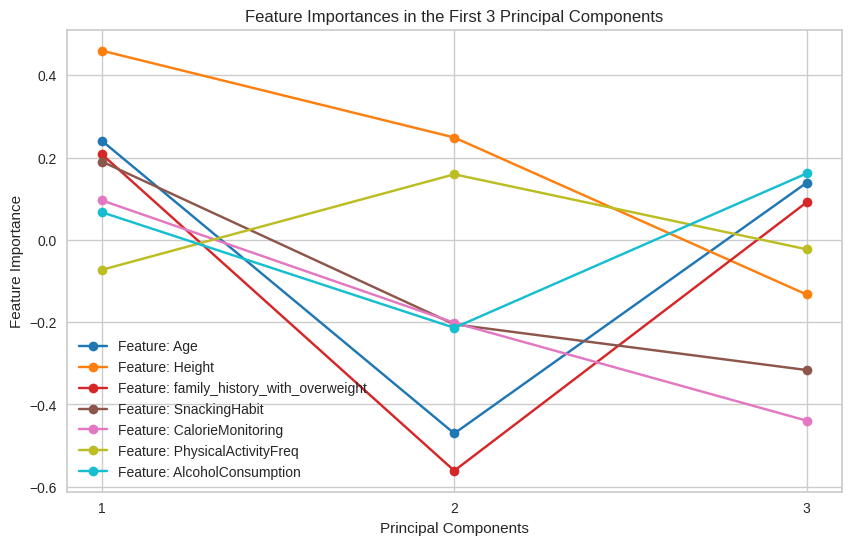

In [ ]:
# Visualize feature importances for the first 3 principal components with unique colors for each feature
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(features)))  # Generate a set of distinct colors
for i, feature_name in enumerate(features):
    plt.plot(range(3), feature_importances[i][:3], marker='o', label=f'Feature: {feature_name}', color=colors[i])  # Assign a unique color to each feature
plt.xticks(range(3), range(1, 4))
plt.xlabel('Principal Components')
plt.ylabel('Feature Importance')
plt.title('Feature Importances in the First 3 Principal Components')
plt.legend()
plt.show()



* In the first principal component (PC), it's evident that variables such as height, age, family history with overweight, and snacking habits exert the most significant influence. These variables collectively account for a substantial portion of the observed variance, indicating their strong association with the underlying patterns in the data.

* Moving to the second principal component, we observe that physical activity frequency and height emerge as the primary drivers of variability. These variables play a prominent role in capturing distinct patterns within the dataset, contributing significantly to the overall variance explained by the second PC.

* Lastly, in the third principal component, alcohol consumption, age, and family history with overweight emerge as the key factors shaping the observed variability. These variables stand out as significant contributors to the variance captured by the third PC, shedding light on distinct patterns and trends present in the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



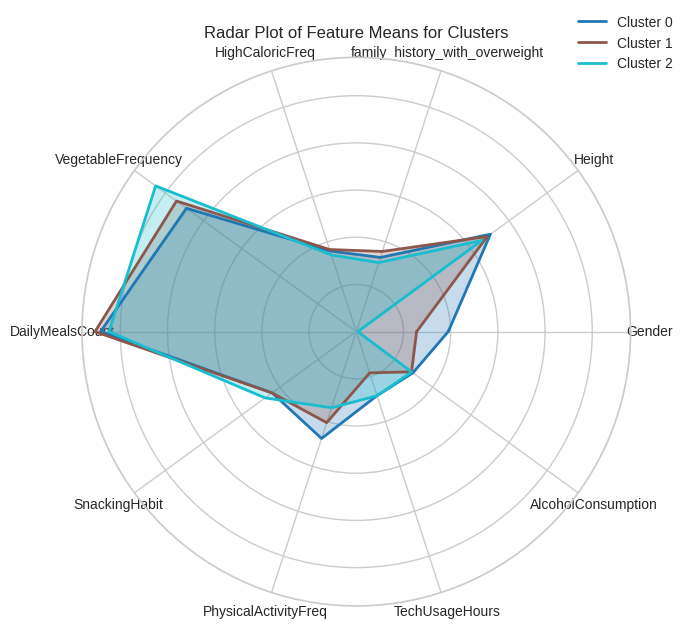

In [ ]:

# Original DataFrame without target and other exclusions
original_df = df.iloc[:, 1:-1]

# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled_data)

# Combine original features with cluster labels
data_with_clusters = pd.concat([original_df, pd.Series(clusters, name='Cluster')], axis=1)

# Compute mean of each feature for each cluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Define function to create radar plot
def create_radar_plot(cluster_means, features):
    num_clusters = len(cluster_means)
    num_features = len(features)
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]
    colors = plt.cm.tab10(np.linspace(0, 1, num_clusters))

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    for i, (cluster, mean_values) in enumerate(cluster_means.iterrows()):
        values = mean_values.values
        values = np.append(values, values[0])  # Move first value to the end for closed plot

        ax.fill(angles, values, color=colors[i], alpha=0.25)
        ax.plot(angles, values, color=colors[i], linewidth=2, label=f'Cluster {cluster}')

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, rotation=45)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.set_title('Radar Plot of Feature Means for Clusters')

    plt.tight_layout()
    plt.show()


# Select the first 13 features from cluster_means
selected_cluster_means = cluster_means.iloc[:, :13]

# Get feature names from the original DataFrame
features = original_df.columns.tolist()[:13]
# Drop 'Smoker' and 'CalorieMonitoring' columns from selected_cluster_means
selected_cluster_means = selected_cluster_means.drop(columns=['Age','Smoker', 'CalorieMonitoring'])

# Get feature names from the original DataFrame excluding 'Age', 'Smoker', and 'CalorieMonitoring'
features_without_age_smoker_calorie = [feature for feature in features if feature not in ['Age', 'Smoker', 'CalorieMonitoring']]

# Call function to create radar plot without 'Age', 'Smoker', and 'CalorieMonitoring' features
create_radar_plot(selected_cluster_means, features_without_age_smoker_calorie)




* One intriguing observation from our data analysis is the absence of males in cluster 2. This cluster stands out for its higher vegetable frequency, elevated snacking habits, and lower levels of physical activity.

* Conversely, cluster 0, which contains more males, exhibits higher levels of physical activity, lower vegetable frequency, and moderate snacking habits.

* This disparity highlights distinct behavioral patterns among different clusters, emphasizing the interplay between gender, dietary habits, and physical activity levels in shaping obesity profiles.

# Conclutions

* In our ML project focused on predicting obesity levels, we found that Random Forest and Radial Kernel SVM emerged as the top-performing models. These models demonstrated robustness in handling non-linear data patterns, a common occurrence in real-world datasets. While these results were largely anticipated, they underscored the effectiveness of these algorithms in capturing the complexities of obesity prediction.

* Furthermore, through unsupervised learning techniques, we gained valuable insights into significant features driving variance within our dataset. Factors such as age, family history of overweight, snacking habits, and physical activity emerged as key contributors to obesity levels. This exploration shed light on the multifaceted nature of obesity, highlighting the importance of maintaining a balanced lifestyle encompassing regular exercise, healthy eating habits, and occasional calorie monitoring.<br><br>

Overall, our project underscores the importance of leveraging advanced ML techniques to not only predict obesity but also to gain deeper insights into the underlying factors influencing it. As we continue our exploration, these findings serve as a reminder of the significance of proactive health management in combating obesity.